In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
%ls

 Volume in drive C is OS
 Volume Serial Number is 42DA-985D

 Directory of C:\Users\mattma\Documents\SelfEducation\UdemyPython4DS\Refactored_Py_DS_ML_Bootcamp-master\13-Logistic-Regression

19/11/2019  03:08 AM    <DIR>          .
19/11/2019  03:08 AM    <DIR>          ..
19/11/2019  03:07 AM    <DIR>          .ipynb_checkpoints
19/11/2019  03:07 AM         1,397,587 01-Logistic Regression with Python.ipynb
07/11/2019  04:38 PM           459,449 02-Logistic Regression Project.ipynb
07/11/2019  04:38 PM           460,822 03-Logistic Regression Project - Solutions.ipynb
07/11/2019  04:38 PM           107,424 advertising.csv
07/11/2019  04:38 PM            28,210 titanic_test.csv
07/11/2019  04:38 PM            60,302 titanic_train.csv
19/11/2019  03:08 AM             1,018 Untitled.ipynb
               7 File(s)      2,514,812 bytes
               3 Dir(s)  205,916,659,712 bytes free


In [5]:
adData = pd.read_csv('advertising.csv')

In [6]:
adData.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [8]:
adData.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [11]:
adData.isnull().any()

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Ad Topic Line               False
City                        False
Male                        False
Country                     False
Timestamp                   False
Clicked on Ad               False
dtype: bool

## titanc data

In [12]:
ttTrainData = pd.read_csv('titanic_train.csv')
ttTestData = pd.read_csv('titanic_test.csv')

In [13]:
ttTrainData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
Age, at a minimum contains NaN.

In [17]:
ttTrainData.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Cabin and 

In [18]:
ttTrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
ttTestData.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [21]:
ttTrainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


import seaborn as sns

In [22]:
import seaborn as sns

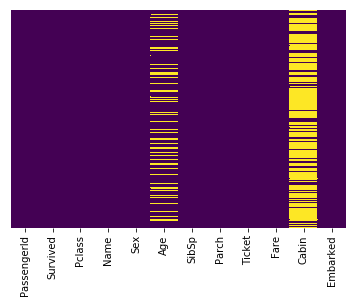

In [25]:
sns.heatmap(ttTrainData.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [26]:
sns.set_style('whitegrid')

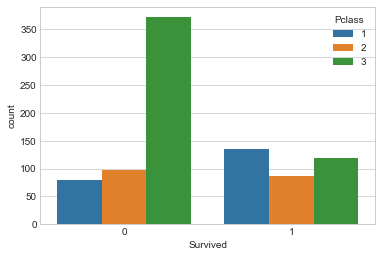

In [32]:
sns.countplot(x='Survived', data=ttTrainData, hue='Pclass')

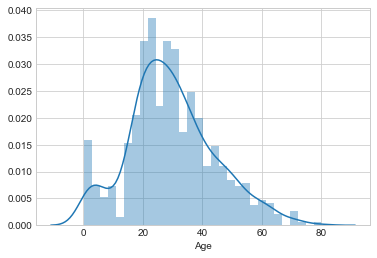

In [38]:
sns.distplot(ttTrainData['Age'].dropna(),   bins=30)

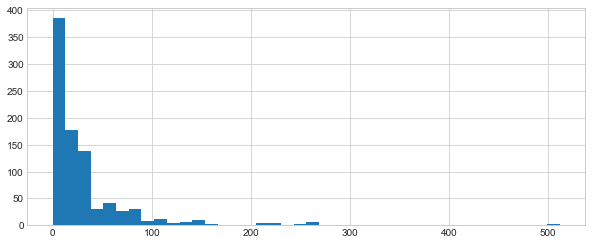

In [43]:
ttTrainData['Fare'].hist(bins=40,figsize=(10,4))

In [46]:
import cufflinks as cf

In [47]:
cf.go_offline()

In [48]:
ttTrainData['Fare'].iplot(kind='hist',bins=30)

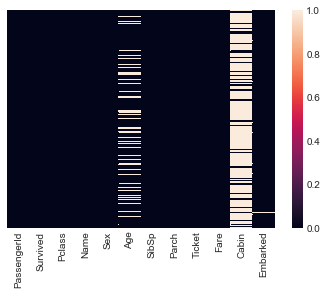

In [49]:
sns.heatmap(ttTrainData.isnull(), yticklabels=False)

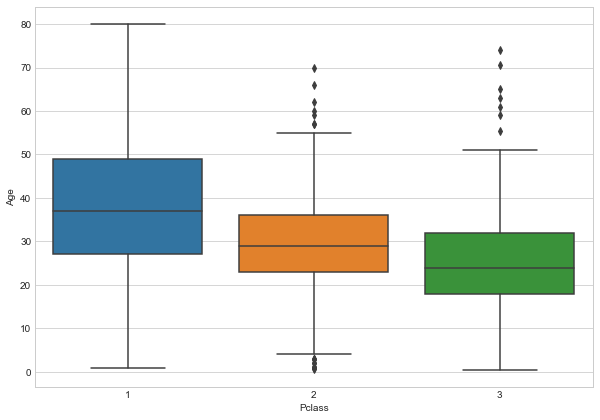

In [50]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=ttTrainData)

In [51]:
def impute_age(cols):
    Age = cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
            

In [52]:
ttTrainData['Age'] = ttTrainData[['Age','Pclass']].apply(impute_age,axis=1)


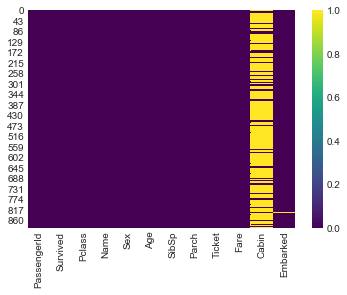

In [53]:
sns.heatmap(ttTrainData.isnull(),cmap='viridis')

In [54]:
ttTrainData.drop('Cabin',axis=1,inplace=True)

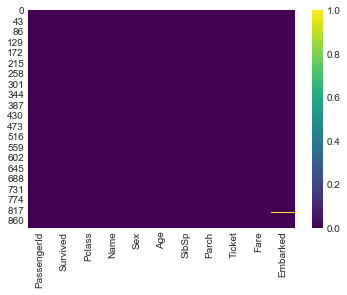

In [55]:
sns.heatmap(ttTrainData.isnull(),cmap='viridis')

In [56]:
ttTrainData.dropna(inplace=True)

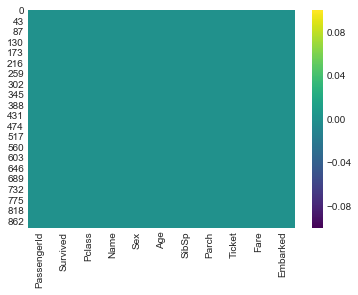

In [57]:
sns.heatmap(ttTrainData.isnull(),cmap='viridis')

In [60]:
sex = pd.get_dummies(ttTrainData['Sex'], drop_first=True)

In [61]:
embark = pd.get_dummies(ttTrainData['Embarked'], drop_first=True)

In [62]:
train = pd.concat([ttTrainData,sex,embark], axis=1)

In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [66]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1, inplace=True)

In [67]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [99]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [70]:
X= train.drop('Survived',axis=1)
y=train['Survived']


In [72]:
from sklearn.model_selection import train_test_split

In [100]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [101]:
lr = LogisticRegression()

In [102]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [103]:
preds = lr.predict(x_test)

In [104]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report(y_test,preds))

             precision    recall  f1-score   support

          0       0.81      0.93      0.86       163
          1       0.85      0.65      0.74       104

avg / total       0.82      0.82      0.81       267



In [106]:
pd.crosstab(y_test,preds)

col_0,0,1
Survived,,
0,151,12
1,36,68


In [107]:
from sklearn.metrics import confusion_matrix

In [108]:
confusion_matrix(y_test,preds)

array([[151,  12],
       [ 36,  68]], dtype=int64)

In [109]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

In [110]:
list(zip(lr.coef_,train.columns))

[(array([  4.07955382e-04,  -7.86365405e-01,  -2.63396134e-02,
          -2.12110745e-01,  -9.70466787e-02,   4.63350974e-03,
          -2.34157562e+00,  -1.74595104e-02,  -1.93376424e-01]), 'Survived')]

In [111]:
c=lr.coef_[0]

In [112]:
list(zip(x_train.columns,c))

[('PassengerId', 0.00040795538194303833),
 ('Pclass', -0.78636540481390194),
 ('Age', -0.026339613359932127),
 ('SibSp', -0.21211074471307459),
 ('Parch', -0.097046678719282908),
 ('Fare', 0.0046335097402377462),
 ('male', -2.3415756197887134),
 ('Q', -0.017459510418981417),
 ('S', -0.19337642400165944)]